AN OVERVIEW OF REGRESSION MODELS USING SKLEARN AND TENSORFLOW

Christian Masdeval - November 2017


In this kernel I will try to bring to you a resume of the analysis I have made in the House Prices dataset. My objective was to explore as many different predective models as possible trying to find the best one. It is divided in the following way:

    Understanding and cleaning the data
    Linear Regression Models
     Linear Regression
     Stochastic Gradient Descent
     Ridge
     Lasso
     Elastic Net
    Suport Vector Machine
    Neural Network
    Random Forests
    Gradient Boosting
    Deep Learning with TensorFlow
    Ensemble Technics

1 . Understanding and cleaning the data

First thing first. As mentioned by several authors, much of the work in make a good model is related to a good feature engineering process. It take a while until we start gain some significant intuition about what is going on but some steps are always present. I will describe what I did trying to stabilize the data and how I got to this decision. Anyway, I think the goals of this step that are always present in any dataset and should guide us are:

    Deal with missing values
    Select the best features

One more thing. As our objective is to analyze the test.csv file, create the submission file and upload it to kaggle, one premisse I have used was not to remove any single line from the test set. We must submit a result file with exactly the number of lines of the original test file.

What is the data

There are excellent kernels showing how to get a glimpse of the data (like Comprehensive data exploration with Python). Most of them have used programming languages like R ore Python to extract useful visualizations. I would also suggest to use the Weka tool to do that. I could get excellent insights about the data via Weka.

We should also look the data dictonary when available. In our case it exists and bring important informations:

    *The categorical and numerial fields
    *The description of each one
    *That there is a category called NA to denote the absence of some characteristic (and Python also use NA)
    *That there are some categorical fields that have only numerical values (and Python will interpret them as numbers)


Categorical field with numerical values

    OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor    


Value NA being used as a category

    Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

Missing values

Maybe the most common problem in real datasets is the presence of null values and most of the implementations of the regression algorithms break in the presence of them. Sometimes, instead of a blank in the position, a wildcard is used like ? or NA. However, as we see above, in the House Prices example the value NA is being used to denote other kind of information, what is a problem. So, our first attempt will be to exchange these NA values to the value 'No', denoting the absence of some characteristic.

Fisrt, lets see what are the missing values

In [106]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
from scipy.stats import norm
from scipy import stats
warnings.filterwarnings('ignore')

np.set_printoptions(threshold=np.nan) #to print all the elements of a matrix
pd.set_option('display.max_rows', 2000)#to print all the elements of a data frame

%matplotlib inline
    
df = pd.read_csv("train.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)
df_test = pd.read_csv("test.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)


In [107]:
print("Shape of training set: ", df.shape)
print("Shape of test set: ", df_test.shape)
data_aux = df.append(df_test) #merging the two datasets to facilitate the cleaning
print("Missing values before remove NA: " , data_aux.columns[data_aux.isnull().any()])

Shape of training set:  (1460, 81)
Shape of test set:  (1459, 80)
Missing values before remove NA:  Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF',
       'Utilities'],
      dtype='object')


Now, lets replace NA for No where appropriate and search for the missing values again.

In [108]:
#Alley
data_aux.Alley.fillna(inplace=True,value='No')

#BsmtQual
data_aux.BsmtQual.fillna(inplace=True,value='No')

#BsmtCond
data_aux.BsmtCond.fillna(inplace=True,value='No')

#BsmtExposure
data_aux.BsmtExposure.fillna(inplace=True,value='No')

#BsmtFinType1
data_aux.BsmtFinType1.fillna(inplace=True,value='No')

#BsmtFinType2
data_aux.BsmtFinType2.fillna(inplace=True,value='No')

#FireplaceQu
data_aux.FireplaceQu.fillna(inplace=True,value='No')    

#GarageType
data_aux.GarageType.fillna(inplace=True,value='No')

#GarageFinish
data_aux.GarageFinish.fillna(inplace=True,value='No')

#GarageQual 
data_aux.GarageQual.fillna(inplace=True,value='No')
    
#GarageCond
data_aux.GarageCond.fillna(inplace=True,value='No')

#PoolQC
data_aux.PoolQC.fillna(inplace=True,value='No')
    
#Fence
data_aux.Fence.fillna(inplace=True,value='No')

#MiscFeature
data_aux.MiscFeature.fillna(inplace=True,value='No')
    
print("Missing values after insert No, i.e., real missing values: " , data_aux.columns[data_aux.isnull().any()])


Missing values after insert No, i.e., real missing values:  Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'SalePrice', 'SaleType', 'TotalBsmtSF',
       'Utilities'],
      dtype='object')


These are the real missing values. Among the columns that were returned, we now going to treat the numeric fields. Note that these numeric fields had NA to denote a missing value. So, the dataset was using the same code to encode two different informations what would cause a lot of confusion!

In [109]:
#Numeric fields    

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)  #insert the mean   
    
#BsmtFinSF1
#df.dropna(axis=0,subset=['BsmtFinSF1'],inplace=True)
#df['BsmtFinSF1'] = imp.fit_transform(df['BsmtFinSF1'].reshape(1,-1)).transpose()    
data_aux.BsmtFinSF1.fillna(inplace=True,value=0)
    
#BsmtFinSF2
#df.dropna(axis=0,subset=['BsmtFinSF2'],inplace=True)
#df['BsmtFinSF2'] = imp.fit_transform(df['BsmtFinSF2'].reshape(1,-1)).transpose()    
data_aux.BsmtFinSF2.fillna(inplace=True,value=0)
    
#BsmtUnfSF
#df.dropna(axis=0,subset=['BsmtUnfSF'],inplace=True)
#df.drop('BsmtUnfSF',axis=1,inplace=True)
#df['BsmtUnfSF'] = imp.fit_transform(df['BsmtUnfSF'].reshape(1,-1)).transpose()    
data_aux.BsmtUnfSF.fillna(inplace=True,value=0)
    
#TotalBsmtSF
#df.dropna(axis=0,subset=['TotalBsmtSF'],inplace=True)
#df['TotalBsmtSF'] = imp.fit_transform(df['TotalBsmtSF'].reshape(1,-1)).transpose()    
data_aux.TotalBsmtSF.fillna(value=0,inplace=True)
    
#BsmtFullBath - apenas na base de teste tem NA.Nao posso remover a linha
#df['BsmtFullBath'] = imp.fit_transform(df['TotalBsmtSF'].reshape(1,-1)).transpose()    
data_aux.BsmtFullBath.fillna(inplace=True,value=0)
    
#BsmtHalfBath- apenas na base de teste tem NA.Nao posso remover a linha
#df['BsmtHalfBath'] = imp.fit_transform(df['BsmtHalfBath'].reshape(1,-1)).transpose()    
data_aux.BsmtHalfBath.fillna(inplace=True,value=0)
        
#GarageCars
#df.dropna(axis=0,subset=['GarageCars'],inplace=True)
#df['GarageCars'] = imp.fit_transform(df['GarageCars'].reshape(1,-1)).transpose()    
data_aux.GarageCars.fillna(value=0,inplace=True)
    
#GarageArea
#df.dropna(axis=0,subset=['GarageArea'],inplace=True)
#df['GarageArea'] = imp.fit_transform(df['GarageArea'].reshape(1,-1)).transpose()    
data_aux.GarageArea.fillna(value=0,inplace=True)
        
#LotFrontage 
data_aux['LotFrontage'].fillna(inplace=True,value=0)
    
#GarageYrBlt - remove the hole column
data_aux.GarageYrBlt.fillna(inplace=True,value=0)
   
#MasVnrArea 
data_aux.MasVnrArea.fillna(inplace=True,value=0)
    

These eleven fields had null values. My first impulse was to fill these missing values with the mean (average) of the whole values of each column or drop the hole column. Latter, i realized that would be better to set zero instead, as this approch could cause less bias. 

Next, we have to deal with the categorical values. In such cases i decided to fill with the most common value of each column, once more trying to cause the less bias as possible. 

In [110]:
#####Categorial fields


#KitchenQual
data_aux.KitchenQual = data_aux.KitchenQual.mode()[0]

#Functional
data_aux.Functional = data_aux.Functional.mode()[0]

#Utilities
data_aux.Utilities = data_aux.Utilities.mode()[0]  
    
#SaleType
data_aux.SaleType  = data_aux.SaleType.mode()[0]
    
#Exterior1st- nao posso remover linhas do teste
data_aux.Exterior1st = data_aux.Exterior1st.mode()[0]

#Exterior2nd
data_aux.Exterior2nd = data_aux.Exterior2nd.mode()[0]       

#Electrical - remove the records where the value is NA
data_aux.Electrical = df['Electrical'].mode()[0]

#MSZoning   - tem NA apenas na base de teste. Como nao posso remover linhas removo a coluna   
data_aux.MSZoning = data_aux.MSZoning.mode()[0]
     
#MasVnrType - remove the records where the value is NA 
data_aux.MasVnrType=df['MasVnrType'].mode()[0]


print("Missing values after all: " , data_aux.columns[data_aux.isnull().any()])


Missing values after all:  Index(['SalePrice'], dtype='object')


We can see that now that there are no missing value. Of course SalePrice does not count because as we merge train and test, this column became empty for the test records.

There is only one more thing to tackle. I have noticed this when i was navigating into Weka and looking the data. Categorical features where the categories are expressed by numbers are treated as quantitative values. This is an undesirable behaviour as we are planning to convert categorical to dummy values and this will not work for this columns. As the sklearn.feature_extraction documentation explains 

    "When feature values are strings, this transformer will do a binary one-hot (aka one-of-K) coding: one boolean-valued feature is constructed for each of the possible string values that the feature can take on. For instance, a feature “f” that can take on the values “ham” and “spam” will become two features in the output, one signifying “f=ham”, the other “f=spam”.

    However, note that this transformer will only do a binary one-hot encoding when feature values are of type string. If categorical features are represented as numeric values such as int, the DictVectorizer can be followed by OneHotEncoder to complete binary one-hot encoding."
    


In [111]:
#Converting numeric columns to nominal before applying dummy convertion
#After converting to String they will be treated as categorical

# MSSubClass as str
print(data_aux['MSSubClass'].dtype)
data_aux['MSSubClass'] = data_aux['MSSubClass'].astype("str")
print(data_aux['MSSubClass'].dtype)

    
# Converting OverallCond to str
data_aux.OverallCond = data_aux.OverallCond.astype("str")

# KitchenAbvGr to categorical
data_aux['KitchenAbvGr'] = data_aux['KitchenAbvGr'].astype("str")
    
# Year and Month to categorical
data_aux['YrSold'] = data_aux['YrSold'].astype("str")
data_aux['MoSold'] = data_aux['MoSold'].astype("str")    


int64
object


The next step in transforming our dataset in one more suitable for being used by predictive models is to re encode the categorical columns. 

In [112]:
data_final = pd.get_dummies(data_aux)

data_train = data_final.iloc[:-df_test.shape[0],:]

print("New shape train:" , np.shape(data_train))
print("Index of SalePrice in the new dataset" , data_train.columns.get_loc('SalePrice'))

data_test = data_final.iloc[df.shape[0]:,:]
data_test.drop('SalePrice',inplace=True,axis=1)

print("New shape test:" , np.shape(data_test))
 
print("Null values train \n", data_train.columns[data_train.isnull().any()])
print("Null values test \n", data_test.columns[data_test.isnull().any()])


print("Columns only in test set : " , data_test.columns.difference(data_train.columns))
print("Columns only in train set : " , data_train.columns.difference(data_test.columns))

New shape train: (1460, 286)
Index of SalePrice in the new dataset 26
New shape test: (1459, 285)
Null values train 
 Index([], dtype='object')
Null values test 
 Index([], dtype='object')
Columns only in test set :  Index([], dtype='object')
Columns only in train set :  Index(['SalePrice'], dtype='object')


Voilà! We now have a new dataset with no null values. I have printed some diagnostic informations for us. 

    *Note that the difference in the number of columns between the train and test set is only one. Is is the expected if all the transformations we did were well done. This extra column in the train set is due to SalePrice.
    *There are the same number of rows as in the begining. 

As the last step, we should select the approprieate features to make the best predicitions. It is usually not an easy task. I have seen several kernels making sofisticated analysis to figure out what variables should stay, what should go, whose should be combined to create new ones and so on. And the work worth while. Inadequate features can result not only in slow down the learning process but also they can disturb the fit process itself. I remember when i was working in the Titanic problem (a starter competition here in Kaggle) that picking just the "Sex" variable was enough to achieve top results and, furthermore, that selecting others features in fact resulted in the decrased of accuracy. 

My approach was try an automatic feature selection. To do that i have used some sklearn functions.

In [113]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel


Basically we run a tree based learning mechanism, like Random Forests, and use the tree structure that these algorithms build to select the prevalent features choosen by them. 

In [114]:
#Tree-based feature selection
y_train = (data_train['SalePrice'])
x_train = (data_train.drop('SalePrice',axis=1))

clf = ExtraTreesRegressor(n_estimators=20)
clf = clf.fit(x_train,y_train)
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(data.index[0], ascending=False).T

print("Features selected with Tree-based selection \n")
yyy = np.asarray((data.columns[0:30]))
xxx = np.asarray((data.iloc[:,0:30]))
print(yyy)
print("\n Relevance of each feature \n")
print(xxx)

model = SelectFromModel(clf, prefit=True)
aux = model.transform(x_train)

print("\n New shape for train after Tree-based feature selection: {}".format(aux.shape))
data_train_less_features = pd.concat([pd.DataFrame(aux),pd.DataFrame(y_train)],axis=1)

aux = model.transform((data_test))
data_test_less_features = pd.DataFrame(aux)
print("\n New shape for test after Tree-based feature selection: {}".format(aux.shape))


print("\n End of the process of try selecting best features \n")

Features selected with Tree-based selection 

['ExterQual_TA' 'GarageCars' 'OverallQual' 'BsmtQual_Ex' 'GrLivArea'
 'FullBath' 'FireplaceQu_No' 'Neighborhood_NoRidge' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'TotRmsAbvGrd' 'Fireplaces' 'BsmtFinSF1' 'LotArea'
 'GarageArea' 'YearRemodAdd' 'GarageType_Attchd' 'BsmtFullBath'
 'MSSubClass_60' 'YearBuilt' 'ExterQual_Fa' 'BsmtQual_Gd' 'BedroomAbvGr'
 'BldgType_1Fam' 'BsmtExposure_Gd' 'LotShape_IR2' 'GarageType_Detchd'
 'HalfBath' 'MasVnrArea']

 Relevance of each feature 

[[ 0.20862385  0.15586793  0.15164911  0.08432507  0.0632082   0.02316811
   0.01905724  0.01775934  0.0157344   0.01555899  0.01302511  0.01181445
   0.0111047   0.00886167  0.00756047  0.00592908  0.00570467  0.00516846
   0.00492678  0.00452315  0.0044685   0.00423346  0.00410909  0.00408606
   0.00388891  0.00377595  0.00351208  0.00340897  0.00324555  0.00306017]]

 New shape for train after Tree-based feature selection: (1460, 27)

 New shape for test after Tree-based fea

Lets take a look. The conclusion of the kernel "Comprehensive data exploration with Python" which took a different approach and made a long and detailed statistic analyse of the features and their relationship, was:

    According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

    'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
    'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. 
    'TotalBsmtSF' and '1stFlrSF' 
    'FullBath'?? Really?
    'TotRmsAbvGrd' and 'GrLivArea' 
    'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. 

Lookly we can see that our approach resulted in the same set of variables. They are listed in order of relevance. Our dataset with less features have now between 25 to 30 columns. 


2. Linear Regression Models

We now will start a serie of evaluations of different algorithms packed in the SKlearn python module. The aim is to collect some performance metric in order to compare the options. As we are dealing with a regression problem, the more appropriated metric is Root Mean Square Error or RMSE. 

Beforeall, lets normalize the data, what will be usefull for all the methods we are going to try. All the trainings will be done using cross validation with five folds.         
    

In [115]:
#Normalization
y_train_aux = ((data_train_less_features['SalePrice']))
x_train_aux = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train_aux))
x_train_scaled = scaler.transform((x_train_aux))

#Some usefull packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split

#Python dictionary to collect the results
RMSE_results = {
    
    'LinearRegression':[0.0],
    'Lasso':[0.0],
    'Ridge':[0.0],
    'SGDR':[0.0],
    'ElasticNet':[0.0],
    'SVM':[0.0],
    'NN':[0.0],
    'GradientBoosting':[0.0],
    'RF':[0.0],
    'TensorFlow':[0.0]
}




In [116]:
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Lasso, LassoCV, ElasticNetCV
print("Linear Regression \n")

#Cross validation
classifierLinearRegression = LinearRegression()
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifierLinearRegression = classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    
#Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['LinearRegression'] = score

Linear Regression 


 Average RMSE: 34691.96047677012


In [117]:
print("SGDRegressor \n\n")

classifier = SGDRegressor()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['SGDR'] = score

SGDRegressor 



 Average RMSE: 34367.65428644493


In [118]:
print("Ridge \n\n")

classifier = RidgeCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['Ridge'] = score

Ridge 



 Average RMSE: 34553.833293763644


In [119]:
print("Lasso \n\n")

classifier = LassoCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['Lasso'] = score

Lasso 



 Average RMSE: 34764.943367012645


In [120]:
print("Elastic Net \n\n")

classifier = ElasticNetCV()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['ElasticNet'] = score

Elastic Net 



 Average RMSE: 72965.30667819285


Lets compare the results so far. 

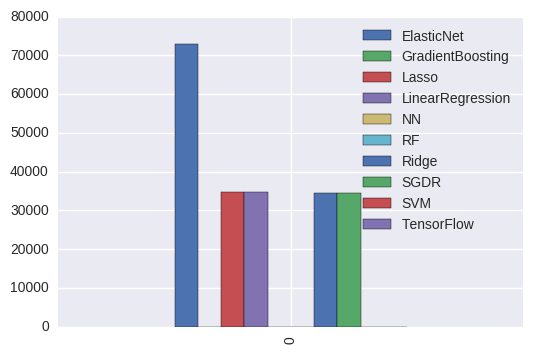

In [121]:
df = pd.DataFrame(RMSE_results)
df.plot(kind='bar')

In [122]:
from sklearn.svm import SVR
print("SVM")

classifierSVR = SVR(kernel='linear', C=1e4) 
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifierSVR = classifierSVR.fit(x_train_fold, y_train_fold)
    pred = classifierSVR.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE less features: {}".format(score))    

RMSE_results['SVM'] = score

SVM

 Average RMSE less features: 34176.82166199838


In [123]:
from sklearn.neural_network import MLPRegressor

# Shuffle
print("Neural Network")
print("\n\n")

classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(80,50,20), random_state=1)
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1    
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

   
# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

RMSE_results['NN'] = score

Neural Network




 Average RMSE: 37946.73106235929


In [124]:
##Random Forests
from sklearn.ensemble import RandomForestRegressor

# Shuffle
print("\n Random Forests \n\n")
print("\n Full Features \n\n")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

y_train_rf = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))

classifierAllFeatures = RandomForestRegressor(n_estimators=60,oob_score=True)

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    x_train_fold = x_train[training]
    y_train_fold = y_train_rf[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train_rf[test]
    
    classifierAllFeatures.fit(x_train_fold, y_train_fold)
    pred = classifierAllFeatures.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE using all features, cross validation and normalizing: {}".format(score))    
print("\n oob score using all features cross validation and normalizing: {}".format(classifierAllFeatures.oob_score_))    


###########Less features
print("\n\n Less features \n\n")


kf = KFold(n_splits=5, random_state=7)    

oos_y = []
oos_pred = []
fold = 0
pred = []

classifierRF_lessFeatures = RandomForestRegressor(n_estimators=60,oob_score=True)

for training, test in kf.split(x_train_scaled):
    fold+=1
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifierRF_lessFeatures.fit(x_train_fold, y_train_fold)
    pred = classifierRF_lessFeatures.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE (cross) less features, normalizing: {}".format(score))    
print("\n oob score (cross) less features, normalizing: {}".format(classifierRF_lessFeatures.oob_score_))    

RMSE_results['RF'] = score


 Random Forests 



 Full Features 



 Average RMSE using all features, cross validation and normalizing: 32054.066267010054

 oob score using all features cross validation and normalizing: 0.844214222648654


 Less features 



 Average RMSE (cross) less features, normalizing: 29694.744396017108

 oob score (cross) less features, normalizing: 0.8496470533775491


Random Forests is one of the most versatile and precise classifier. It does nod need the data being normalized and can deal with any number of features. So, i have tried something new this time. I did two trainings, one with all the features and other with the features we had choosen previously. 

As you can see, it did well in both cases. This test was also interesting to validate our automatic selected features. Seems they were really good options. 

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
print("\n\n Gradient Boosting \n\n")


classifierGBR = GradientBoostingRegressor(n_estimators=1100, learning_rate=0.05, 
                                               min_samples_leaf=25, min_samples_split=20, loss='huber')

# Split into train/test
x_train, x_test, y_train_gb, y_test = train_test_split(x_train_scaled,y_train,test_size=0.20, random_state=43)

classifierGBR.fit(x_train, y_train_gb)

# The mean squared error
pred = classifierGBR.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))

RMSE_results['GradientBoosting'] = score



 Gradient Boosting 


Mean squared error: 34522.18856495878


In [126]:
import tensorflow as tf
import tensorflow.contrib.learn as learn
import shutil 
import os

print(" \n TensorFlow \n\n")

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Set the desired TensorFlow output level for this example
tf.logging.set_verbosity(tf.logging.ERROR)


feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x_train.shape[1])]
classifierDNN = learn.DNNRegressor(
                                   #hidden_units=[200,100, 80, 80, 50, 50, 80,80], 
                                   hidden_units=[ 80, 80, 20], 
                                   feature_columns=feature_columns,                                   
                                  )


kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    # Early stopping
    validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    x_test_fold,
    y_test_fold,
    every_n_steps=500,
    #metrics=validation_metrics,
    early_stopping_metric="loss",
    early_stopping_metric_minimize=True,
    early_stopping_rounds=400)
        
    classifierDNN.fit(x_train_fold, y_train_fold, monitors=[validation_monitor] ,steps=1000)
    pred = (list(classifierDNN.predict(x_test_fold, as_iterable=True)))
    
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

RMSE_results['TensorFlow'] = score

 
 TensorFlow 


Fold #1
Fold score (RMSE): 28717.57
Fold #2
Fold score (RMSE): 35082.43
Fold #3
Fold score (RMSE): 31793.14
Fold #4
Fold score (RMSE): 23691.11
Fold #5
Fold score (RMSE): 35482.55

 Average RMSE: 31261.98945621981


Done! We have tested ten different classifiers in the House Prices problem. Lets now compare the performance of each one. 

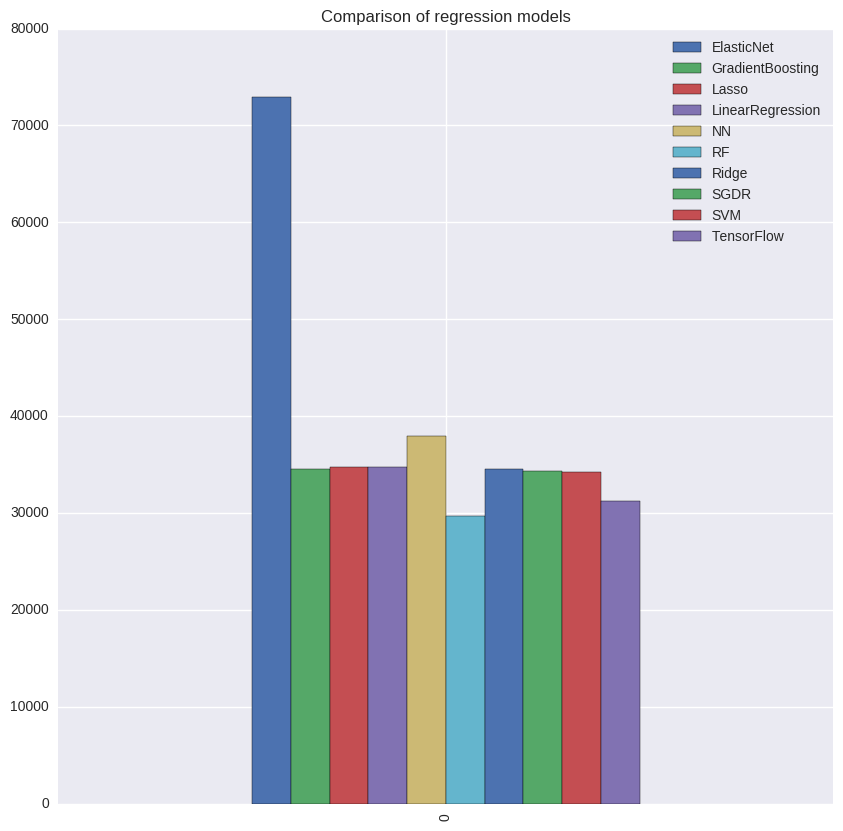

In [131]:
df = pd.DataFrame(RMSE_results,index=[0])
df.plot(kind='bar',title="Comparison of regression models",figsize=(10,10))

To conclude, lets try one more technique that, in general, leads to good results. They are called Ensemble Methods and consist of combine different procedures to achieve a better outcome. I have used the "avering ensemble method" which is literally take the average of some results.

In [133]:
#Emsemble via avereging

final_labels = (
                (classifierLinearRegression.predict((data_test_less_features)))  
                + (classifierSVR.predict((data_test_less_features))) 
                + (classifierRF_lessFeatures.predict((data_test_less_features)))
                + (classifierGBR.predict((data_test_less_features)))                 
               ) / 4

